# DCMIP test case 4 demo - 3
-------

Here, the ability of the dynamical core to simulate a tropical cyclone is tested.

The main aim here is to simulate a tropical cyclone using a simple physics package 
(Reed and Jablonowski (2012)).

Jablonowski's group provides a fortran file which generates the initial conditions
to test any dynamical core. We have written a Cython wrapper around it, and use it to
start the simulation. We also have a wrapper around the simple physics package, which
provides the tendencies during each time step.

Using netCDF4 interface for IO
Lats, lons, levs, trunc, dims, tracers 44 92 28 28 435 1


<IPython.core.display.Javascript object>


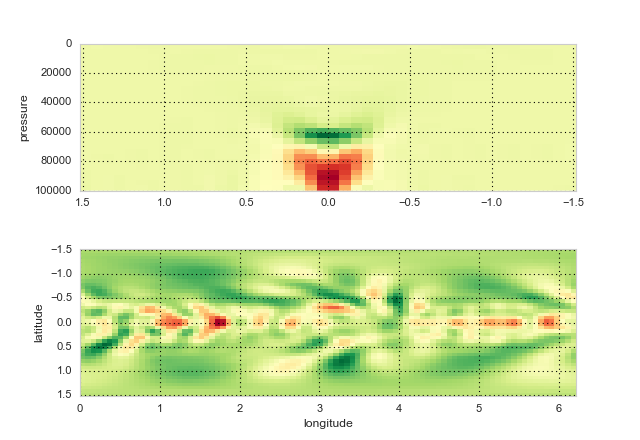

In [1]:
#%%file testSimple.py
%matplotlib notebook

from dynamics import dynamics
from dcmip import getTropicalCycloneICs
from federation import federation

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid',rc={'grid.linestyle':'dotted', 'grid.color':'0.0'})
# Dynamical core parameters
import matplotlib as mpl

mpl.rc('text', color='w')

kwargs = {}
kwargs['dt'] = 1200
kwargs['nlon'] = 92
kwargs['nlat'] = 44
kwargs['MonitorFields'] = ['U','ps'] # Display zonal velocity during simulation
kwargs['MonitorFreq'] = 1200. #6 hourly update

#Init the dynamics Component
dycore = dynamics(scheme='gfs', **kwargs)

#Get the pressure and lat/lon values; this is needed
#to generate the initial conditions
pressure = dycore['p']
ps = dycore['ps']

full_latitudes = dycore.Extension.latitudes
full_longitudes = dycore.Extension.longitudes

#Get new initial conditions
u,v,t,q,phis,ps = getTropicalCycloneICs(pressure, full_longitudes, full_latitudes)
#Dynamical core expects virtual temperature
theta = t*(1+0.608*q)

#Initialise model topography
dycore.Extension.set_topography(phis)

#Initialise winds, surface pressure and temperature
dycore.Extension.initial_conditions(u,v,theta,ps,q)
dycore_grid = dycore.Grid
#Setup simple physics

for i in range(1000):
    dycore.step()



<IPython.core.display.Javascript object>


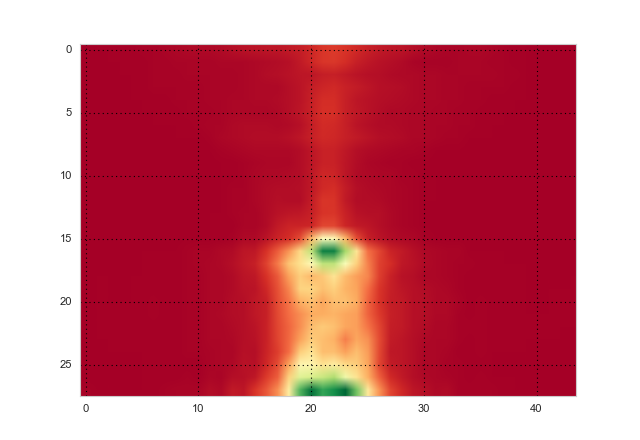

In [2]:
plt.ioff()
plt.figure()
dycore.step()
temp = dycore['T']
temp = abs(temp - temp.mean(axis=0))

plt.imshow(temp.mean(axis=0).transpose()[::-1],cmap='RdYlGn')
plt.show()